In the following example, we start from a simple boxplot and add annotations to it.

To do so we:

- calculate the median sepal_length for each group and store them in a variable named 'medians'
- we then create a 'nobs' list which stores the number of observations for each group
- eventually, we add labels to our figure.

To add labels, keep in mind that seaborn is built on top of matplotlib, thus seaborn objects can be stored in matplotlib axes or figures (here we store the boxplot in a matplotlib.axes object named ax). This enables us to use matplotlib.axes .get_xticklabels() as well as .text() functions and its various parameters (horizontalalignment, size, color, weight) to add text to our figure.


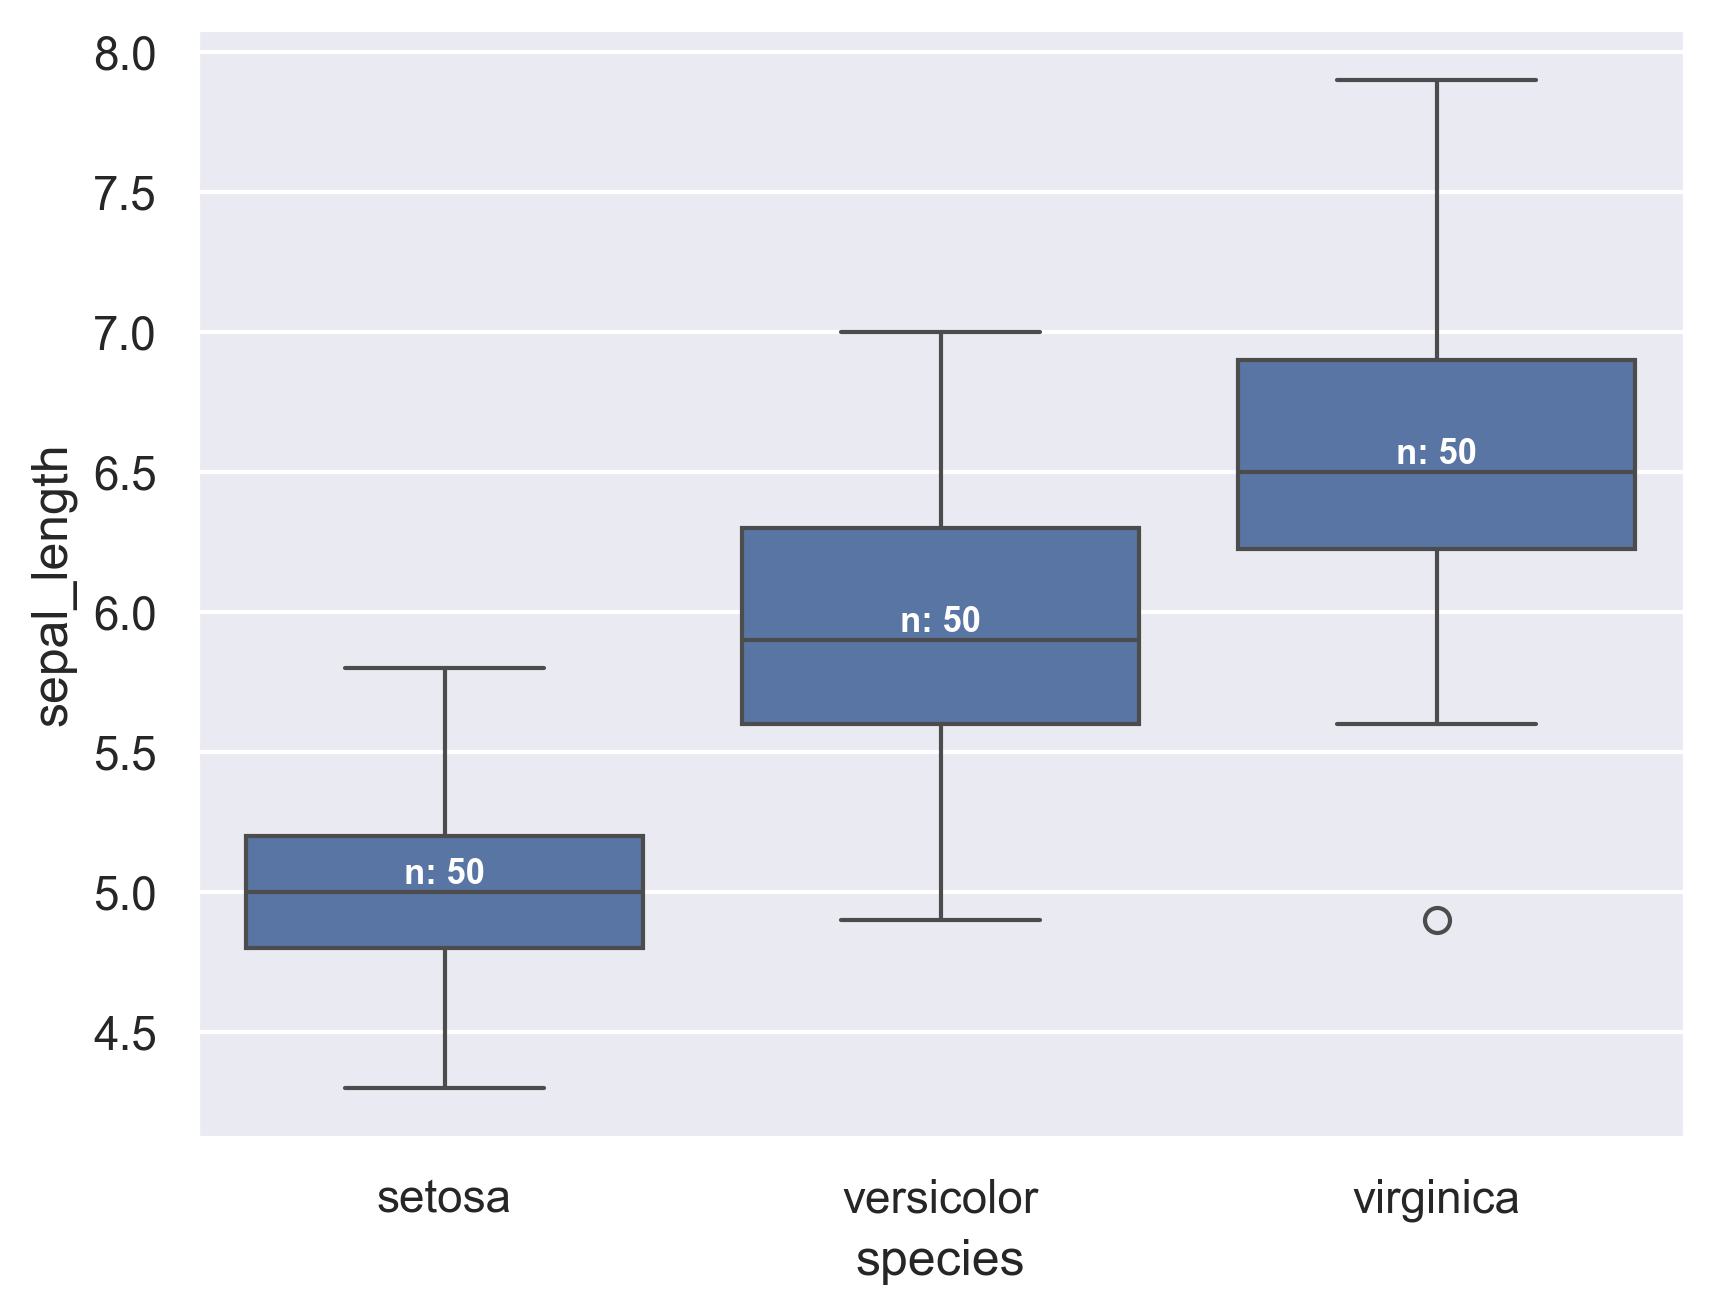

In [1]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
df = sns.load_dataset('iris')
 
ax = sns.boxplot(x="species", y="sepal_length", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['species'])['sepal_length'].median().values
nobs = df['species'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold')
 
plt.show()